In [1]:
import csv
import networkx as nx
import numpy as np
import pandas as pd
import array
import tempfile
import urllib
%matplotlib inline
# library for displaying plots
import matplotlib.pyplot as plt
# display plots in the notebook
# if this is not set, you will not see the graphic here
import seaborn as sns
from scipy import stats
import matplotlib as mpl
from random import randint
from enum import Enum

class Soil(Enum):
    WOOD = 1
    CERAMICS = 2
    MARBLE = 3
    CONCRETE = 4
    
class Cloth(Enum):
    DRESS = 1
    SKIRT = 2
    SHORT = 3
    JEANWOMAN = 4
    PANT = 5
    JEANMAN = 6
    
#Exits
EXIT_FIRST_FLOOR = 44 # 45 IN THE PICTURE
EXIT_SECOND_FLOOR = 29 # 30 IN THE PICTURE
EXIT_GROUND_FLOOR = 64 # 65 IN THE PICTURE

#Offices
OFFICE_FIRST_FLOOR = 20
OFFICE_SECOND_FLOOR = 9
OFFICE_GROUND_FLOOR = 42

#Type of speed
NORMAL = 0
FAST = 1

#Save Average Time
times_normal_men = array.array('f',(0.0 for i in range(0,24)))
times_fast_men = array.array('f',(0.0 for i in range(0,24)))
times_normal_women = array.array('f',(0.0 for i in range(0,24)))
times_fast_women = array.array('f',(0.0 for i in range(0,24)))
# Cant People walking on a different superfice
cant_men_soil = array.array('f',(0.0 for i in range(0,24)))
cant_women_soil = array.array('f',(0.0 for i in range(0,24)))
# dataset
dataset = []

# Number of Person (Sex)
MALE = 1
FEMALE = 2
CANT_MALE = 0
CANT_FEMALE = 0

#People for the simulation
COLUMNS = ["HHX","FMX","FPX","SEX","BMI","SLEEP","educ","height","weight"]
people_csv = pd.read_csv("people.csv", sep=",", names=COLUMNS, skipinitialspace=True)
#Convert file people to csv
#people_csv = pd.read_csv(people_data, names=COLUMNS, skipinitialspace=True, skiprows=1)
people = people_csv.as_matrix()
#Put a person in the different offices 
peopleInOfficeOne = array.array('i',(0 for i in range(0,OFFICE_FIRST_FLOOR)))
peopleInOfficeTwo = array.array('i',(0 for i in range(0,OFFICE_SECOND_FLOOR)))
peopleInOfficeGnd = array.array('i',(0 for i in range(0,OFFICE_GROUND_FLOOR)))

peopleInOfficeOne
peopleInOfficeTwo
peopleInOfficeGnd

array('i', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [2]:
# Get the floor of the building
# 0: Ground Floor
# 1: First Floor
# 2: Second Floor
def getFloor():
    return randint(0,2);

# Get Office of the floor 
def getOfficeFloor(floor):
    if (floor == 0):# First Floor
        return randint(0,OFFICE_FIRST_FLOOR -1)
    elif(floor == 1):# Second Floor
        return randint(0,OFFICE_SECOND_FLOOR -1)
    elif(floor == 2):# Ground Floor
        return randint(0,OFFICE_GROUND_FLOOR -1)
    return 0

# Set people in the building's office
def setPeopleInOffice(floor, office):
    if (floor == 0): # First Floor
        peopleInOfficeOne[office] = peopleInOfficeOne[office] + 1
    elif (floor == 1):# Second Floor
        peopleInOfficeTwo[office] = peopleInOfficeTwo[office] + 1
    elif (floor == 2):# Ground Floor
        peopleInOfficeGnd[office] = peopleInOfficeGnd[office] + 1

# Get First Floor Graph
def getGraphFFloor():
    reader = csv.reader(open("floor_one.csv", "rb"), delimiter=";")
    x = list(reader)
    ffloor = np.array(x).astype("float")
    return nx.from_numpy_matrix(ffloor, create_using=nx.DiGraph())


# Get Second Floor Graph
def getGraphSFloor():
    reader1 = csv.reader(open("floor_two.csv", "rb"), delimiter=";")
    y = list(reader1)
    sfloor = np.array(y).astype("float")
    return nx.from_numpy_matrix(sfloor, create_using=nx.DiGraph())

# Get Ground Floor Graph
def getGraphGFloor():
    reader2 = csv.reader(open("floor_ground.csv", "rb"), delimiter=";")
    z = list(reader2)
    gfloor = np.array(z).astype("float")
    return nx.from_numpy_matrix(gfloor, create_using=nx.DiGraph())


# Get the way of a person of exit to the building
def getPathofPerson(floor, office):
    if (floor == 0): # First Floor
        return nx.bidirectional_dijkstra(graph_floor_one, office, EXIT_FIRST_FLOOR)
    elif (floor == 1):# Second Floor
        return nx.bidirectional_dijkstra(graph_floor_two, office, EXIT_SECOND_FLOOR)
    elif (floor == 2):# Ground Floor
        return nx.bidirectional_dijkstra(graph_floor_gnd, office, EXIT_GROUND_FLOOR)
    return 0

def getTypeofSoil(floor,node):
    if (floor == 0): #First Floor
        if (node >=0 and node <33):
            return Soil.CERAMICS
        elif (node >= 33 and node <36):
            return Soil.WOOD
        elif (node == 36 or node == 37):
            return Soil.MARBLE
        elif (node >37 and node <44):
            return Soil.CONCRETE
    elif (floor == 1): # Second Floor
        if (node >=0 and node <16):
            return Soil.CERAMICS
        elif (node >= 16 and node <=20):
            return Soil.WOOD
        elif (node == 21 or node == 22):
            return Soil.MARBLE
        elif (node >22 and node <29):
            return Soil.CONCRETE
    elif (floor == 2): # Ground Floor
        if (node >=0 and node <56):
            return Soil.CERAMICS
        elif (node == 56 or node == 57):
            return Soil.MARBLE
        elif (node >=58 and node <64):
            return Soil.CONCRETE
    return Soil.CERAMICS

def setAge(sex, age):
    signo = randint(0,1);
    if(sex == 0):#Male
        if(age == 0):#64-75
            incremento = 0.3
            if signo == 1:
                incremento = -0.3
            return 1.96 + incremento;
        else:
            incremento = 0.4
            if signo == 1:
                incremento = -0.4
            return 1.76;
    elif(sex == 1):#Female
        if(age == 0):#64-75
            incremento = 0.2
            if signo == 1:
                incremento = -0.2
            return 1.70;
        else:
            incremento = 0.3
            if signo == 1:
                incremento = -0.3
            return 1.40;


def getVelocityXSoilBMIMan(speed,soil,bmi,age):
    incremento = setAge(0,age);
    if (speed == NORMAL): # Normal Speed
        if (bmi < 20.0):
            if (soil == Soil.WOOD):
                return 1.45 + incremento
            elif (soil == Soil.CERAMICS):
                return 1.47 + incremento
            elif (soil == Soil.MARBLE):
                return 1.48 + incremento
            elif (soil == Soil.CONCRETE):
                return 1.50 + incremento
        elif (bmi >= 20 and bmi < 25):
            if (soil == Soil.WOOD):
                return 1.42 + incremento
            elif (soil == Soil.CERAMICS):
                return 1.49 + incremento
            elif (soil == Soil.MARBLE):
                return 1.46 + incremento
            elif (soil == Soil.CONCRETE):
                return 1.49 + incremento 
        elif (bmi >= 25 and bmi < 30):
            if (soil == Soil.WOOD):
                return 1.40 + incremento
            elif (soil == Soil.CERAMICS):
                return 1.44 + incremento
            elif (soil == Soil.MARBLE):
                return 1.43 + incremento
            elif (soil == Soil.CONCRETE):
                return 1.45 + incremento 
        elif (bmi >= 30.0 and bmi < 35):
            if (soil == Soil.WOOD):
                return 1.35 + incremento
            elif (soil == Soil.CERAMICS):
                return 1.39 + incremento
            elif (soil == Soil.MARBLE):
                return 1.38 + incremento
            elif (soil == Soil.CONCRETE):
                return 1.41 + incremento 
        elif (bmi >= 35 and bmi < 40):
            if (soil == Soil.WOOD):
                return 1.27 + incremento
            elif (soil == Soil.CERAMICS):
                return 1.31 + incremento
            elif (soil == Soil.MARBLE):
                return 1.30 + incremento
            elif (soil == Soil.CONCRETE):
                return 1.33 + incremento 
        elif (bmi > 40):
            if (soil == Soil.WOOD):
                return 1.26 + incremento
            elif (soil == Soil.CERAMICS):
                return 1.30 + incremento
            elif (soil == Soil.MARBLE):
                return 1.29 + incremento
            elif (soil == Soil.CONCRETE):
                return 1.31 + incremento 
    elif (speed == FAST): # Fast Speed
        if (bmi < 20.0):
            if (soil == Soil.WOOD):
                return 1.74 + incremento
            elif (soil == Soil.CERAMICS):
                return 1.78 + incremento
            elif (soil == Soil.MARBLE):
                return 1.77 + incremento
            elif (soil == Soil.CONCRETE):
                return 1.79 + incremento
        elif (bmi >= 20 and bmi < 25):
            if (soil == Soil.WOOD):
                return 1.7 + incremento
            elif (soil == Soil.CERAMICS):
                return 1.74 + incremento
            elif (soil == Soil.MARBLE):
                return 1.73 + incremento
            elif (soil == Soil.CONCRETE):
                return 1.75 + incremento 
        elif (bmi >= 25 and bmi < 30):
            if (soil == Soil.WOOD):
                return 1.65 + incremento
            elif (soil == Soil.CERAMICS):
                return 1.69 + incremento
            elif (soil == Soil.MARBLE):
                return 1.68 + incremento
            elif (soil == Soil.CONCRETE):
                return 1.70 + incremento 
        elif (bmi >= 30.0 and bmi < 35):
            if (soil == Soil.WOOD):
                return 1.59 + incremento
            elif (soil == Soil.CERAMICS):
                return 1.63 + incremento
            elif (soil == Soil.MARBLE):
                return 1.62 + incremento
            elif (soil == Soil.CONCRETE):
                return 1.65 + incremento 
        elif (bmi >= 35 and bmi < 40):
            if (soil == Soil.WOOD):
                return 1.55 + incremento
            elif (soil == Soil.CERAMICS):
                return 1.59 + incremento
            elif (soil == Soil.MARBLE):
                return 1.58 + incremento
            elif (soil == Soil.CONCRETE):
                return 1.60 + incremento 
        elif (bmi > 40):
            if (soil == Soil.WOOD):
                return 1.5 + incremento
            elif (soil == Soil.CERAMICS):
                return 1.54 + incremento
            elif (soil == Soil.MARBLE):
                return 1.53 + incremento
            elif (soil == Soil.CONCRETE):
                return 1.55 + incremento
    return 1
        

def getVelocityXSoilBMIWomen(speed,soil,bmi,age):
    incremento = setAge(1,age);
    if (speed == NORMAL): # Normal Speed
        if (bmi < 20.0):
            if (soil == Soil.WOOD):
                return 1.41 + incremento
            elif (soil == Soil.CERAMICS):
                return 1.45 + incremento
            elif (soil == Soil.MARBLE):
                return 1.42 + incremento
            elif (soil == Soil.CONCRETE):
                return 1.46 + incremento
        elif (bmi >= 20 and bmi < 25):
            if (soil == Soil.WOOD):
                return 1.4 + incremento
            elif (soil == Soil.CERAMICS):
                return 1.43 + incremento
            elif (soil == Soil.MARBLE):
                return 1.41 + incremento
            elif (soil == Soil.CONCRETE):
                return 1.45 + incremento 
        elif (bmi >= 25 and bmi < 30):
            if (soil == Soil.WOOD):
                return 1.36 + incremento
            elif (soil == Soil.CERAMICS):
                return 1.4 + incremento
            elif (soil == Soil.MARBLE):
                return 1.37 + incremento
            elif (soil == Soil.CONCRETE):
                return 1.41 + incremento 
        elif (bmi >= 30.0 and bmi < 35):
            if (soil == Soil.WOOD):
                return 1.32 + incremento
            elif (soil == Soil.CERAMICS):
                return 1.35 + incremento
            elif (soil == Soil.MARBLE):
                return 1.33 + incremento
            elif (soil == Soil.CONCRETE):
                return 1.37 + incremento 
        elif (bmi >= 35 and bmi < 40):
            if (soil == Soil.WOOD):
                return 1.24 + incremento
            elif (soil == Soil.CERAMICS):
                return 1.27 + incremento
            elif (soil == Soil.MARBLE):
                return 1.25 + incremento
            elif (soil == Soil.CONCRETE):
                return 1.29 + incremento 
        elif (bmi > 40):
            if (soil == Soil.WOOD):
                return 1.22 + incremento
            elif (soil == Soil.CERAMICS):
                return 1.26 + incremento
            elif (soil == Soil.MARBLE):
                return 1.23 + incremento
            elif (soil == Soil.CONCRETE):
                return 1.27 + incremento 
    elif (speed == FAST): # Fast Speed
        if (bmi < 20.0):
            if (soil == Soil.WOOD):
                return 1.7 + incremento
            elif (soil == Soil.CERAMICS):
                return 1.74 + incremento
            elif (soil == Soil.MARBLE):
                return 1.71 + incremento
            elif (soil == Soil.CONCRETE):
                return 1.75 + incremento
        elif (bmi >= 20 and bmi < 25):
            if (soil == Soil.WOOD):
                return 1.66 + incremento
            elif (soil == Soil.CERAMICS):
                return 1.7 + incremento
            elif (soil == Soil.MARBLE):
                return 1.67 + incremento
            elif (soil == Soil.CONCRETE):
                return 1.71 + incremento 
        elif (bmi >= 25 and bmi < 30):
            if (soil == Soil.WOOD):
                return 1.61 + incremento
            elif (soil == Soil.CERAMICS):
                return 1.65 + incremento
            elif (soil == Soil.MARBLE):
                return 1.62 + incremento
            elif (soil == Soil.CONCRETE):
                return 1.66 + incremento 
        elif (bmi >= 30.0 and bmi < 35):
            if (soil == Soil.WOOD):
                return 1.56 + incremento
            elif (soil == Soil.CERAMICS):
                return 1.59 + incremento
            elif (soil == Soil.MARBLE):
                return 1.57 + incremento
            elif (soil == Soil.CONCRETE):
                return 1.61 + incremento 
        elif (bmi >= 35 and bmi < 40):
            if (soil == Soil.WOOD):
                return 1.51 + incremento
            elif (soil == Soil.CERAMICS):
                return 1.55 + incremento
            elif (soil == Soil.MARBLE):
                return 1.52 + incremento
            elif (soil == Soil.CONCRETE):
                return 1.56 + incremento 
        elif (bmi > 40):
            if (soil == Soil.WOOD):
                return 1.46 + incremento
            elif (soil == Soil.CERAMICS):
                return 1.5 + incremento
            elif (soil == Soil.MARBLE):
                return 1.47 + incremento
            elif (soil == Soil.CONCRETE):
                return 1.51 + incremento
    return 0

def setTimeXBMISoil(bmi, soil, sex, time, array):
    if (sex == FEMALE): 
        if (bmi < 20.0):
            if (soil == Soil.WOOD):
                array[0] = array[0] + time
            elif (soil == Soil.CERAMICS):
                array[1] = array[1] + time
            elif (soil == Soil.MARBLE):
                array[2] = array[2] + time
            elif (soil == Soil.CONCRETE):
                array[3] = array[3] + time
        elif (bmi >= 20 and bmi < 25):
            if (soil == Soil.WOOD):
                array[4] = array[4] + time
            elif (soil == Soil.CERAMICS):
                array[5] = array[5] + time
            elif (soil == Soil.MARBLE):
                array[6] = array[6] + time
            elif (soil == Soil.CONCRETE):
                array[7] = array[7] + time 
        elif (bmi >= 25 and bmi < 30):
            if (soil == Soil.WOOD):
                array[8] = array[8] + time
            elif (soil == Soil.CERAMICS):
                array[9] = array[9] + time
            elif (soil == Soil.MARBLE):
                array[10] = array[10] + time
            elif (soil == Soil.CONCRETE):
                array[11] = array[11] + time 
        elif (bmi >= 30.0 and bmi < 35):
            if (soil == Soil.WOOD):
                array[12] = array[12] + time
            elif (soil == Soil.CERAMICS):
                array[13] = array[13] + time
            elif (soil == Soil.MARBLE):
                array[14] = array[14] + time
            elif (soil == Soil.CONCRETE):
                array[15] = array[15] + time 
        elif (bmi >= 35 and bmi < 40):
            if (soil == Soil.WOOD):
                array[16] = array[16] + time
            elif (soil == Soil.CERAMICS):
                array[17] = array[17] + time
            elif (soil == Soil.MARBLE):
                array[18] = array[18] + time
            elif (soil == Soil.CONCRETE):
                array[19] = array[19] + time 
        elif (bmi > 40):
            if (soil == Soil.WOOD):
                array[20] = array[20] + time
            elif (soil == Soil.CERAMICS):
                array[21] = array[21] + time
            elif (soil == Soil.MARBLE):
                array[22] = array[22] + time
            elif (soil == Soil.CONCRETE):
                array[23] = array[23] + time 
    elif (sex == MALE): # Fast Speed
        if (bmi < 20.0):
            if (soil == Soil.WOOD):
                array[0] = array[0] + time
            elif (soil == Soil.CERAMICS):
                array[1] = array[1] + time
            elif (soil == Soil.MARBLE):
                array[2] = array[2] + time
            elif (soil == Soil.CONCRETE):
                array[3] = array[3] + time
        elif (bmi >= 20 and bmi < 25):
            if (soil == Soil.WOOD):
                array[4] = array[4] + time
            elif (soil == Soil.CERAMICS):
                array[5] = array[5] + time
            elif (soil == Soil.MARBLE):
                array[6] = array[6] + time
            elif (soil == Soil.CONCRETE):
                array[7] = array[7] + time 
        elif (bmi >= 25 and bmi < 30):
            if (soil == Soil.WOOD):
                array[8] = array[8] + time
            elif (soil == Soil.CERAMICS):
                array[9] = array[9] + time
            elif (soil == Soil.MARBLE):
                array[10] = array[10] + time
            elif (soil == Soil.CONCRETE):
                array[11] = array[11] + time
        elif (bmi >= 30.0 and bmi < 35):
            if (soil == Soil.WOOD):
                array[12] = array[12] + time
            elif (soil == Soil.CERAMICS):
                array[13] = array[13] + time
            elif (soil == Soil.MARBLE):
                array[14] = array[14] + time
            elif (soil == Soil.CONCRETE):
                array[15] = array[15] + time 
        elif (bmi >= 35 and bmi < 40):
            if (soil == Soil.WOOD):
                array[16] = array[16] + time
            elif (soil == Soil.CERAMICS):
                array[17] = array[17] + time
            elif (soil == Soil.MARBLE):
                array[18] = array[18] + time
            elif (soil == Soil.CONCRETE):
                array[19] = array[19] + time 
        elif (bmi > 40):
            if (soil == Soil.WOOD):
                array[20] = array[20] + time
            elif (soil == Soil.CERAMICS):
                array[21] = array[21] + time
            elif (soil == Soil.MARBLE):
                array[22] = array[22] + time
            elif (soil == Soil.CONCRETE):
                array[23] = array[23] + time


def setPeopleBySoilAndBMI(bmi, soil, array): 
    if (bmi < 20.0):
        if (soil == Soil.WOOD):
            array[0] = array[0] + 1
        elif (soil == Soil.CERAMICS):
            array[1] = array[1] + 1
        elif (soil == Soil.MARBLE):
            array[2] = array[2] + 1
        elif (soil == Soil.CONCRETE):
            array[3] = array[3] + 1
    elif (bmi >= 20 and bmi < 25):
        if (soil == Soil.WOOD):
            array[4] = array[4] + 1
        elif (soil == Soil.CERAMICS):
            array[5] = array[5] + 1
        elif (soil == Soil.MARBLE):
            array[6] = array[6] + 1
        elif (soil == Soil.CONCRETE):
            array[7] = array[7] + 1 
    elif (bmi >= 25 and bmi < 30):
        if (soil == Soil.WOOD):
            array[8] = array[8] + 1
        elif (soil == Soil.CERAMICS):
            array[9] = array[9] + 1
        elif (soil == Soil.MARBLE):
            array[10] = array[10] + 1
        elif (soil == Soil.CONCRETE):
            array[11] = array[11] + 1 
    elif (bmi >= 30.0 and bmi < 35):
        if (soil == Soil.WOOD):
            array[12] = array[12] + 1
        elif (soil == Soil.CERAMICS):
            array[13] = array[13] + 1
        elif (soil == Soil.MARBLE):
            array[14] = array[14] + 1
        elif (soil == Soil.CONCRETE):
            array[15] = array[15] + 1 
    elif (bmi >= 35 and bmi < 40):
        if (soil == Soil.WOOD):
            array[16] = array[16] + 1
        elif (soil == Soil.CERAMICS):
            array[17] = array[17] + 1
        elif (soil == Soil.MARBLE):
            array[18] = array[18] + 1
        elif (soil == Soil.CONCRETE):
            array[19] = array[19] + 1 
    elif (bmi > 40):
        if (soil == Soil.WOOD):
            array[20] = array[20] + 1
        elif (soil == Soil.CERAMICS):
            array[21] = array[21] + 1
        elif (soil == Soil.MARBLE):
            array[22] = array[22] + 1
        elif (soil == Soil.CONCRETE):
            array[23] = array[23] + 1 
    
    
def getTimePersonPath(floor, path, bmi, speed, sex, age):
    time = 0.0
    velocity = 0.0
    if (floor == 0): # First Floor
        size = len(path)
        i = 0
        while(size > i+1):
            soil = getTypeofSoil(floor,path[i])
            distance = graph_floor_one[path[i]][path[i+1]]['weight']
            if (sex == FEMALE):# Female
                velocity = getVelocityXSoilBMIWomen(speed, soil, bmi, age)/2
            elif (sex == MALE):# Male
                velocity = getVelocityXSoilBMIMan(speed, soil, bmi, age)/2
            timen = (distance/velocity)
            if (sex == MALE):
                if (speed == NORMAL):
                    setTimeXBMISoil(bmi, soil, sex, timen, times_normal_men)
                elif (speed == FAST):
                    setTimeXBMISoil(bmi, soil, sex, timen, times_fast_men)
                setPeopleBySoilAndBMI(bmi, soil, cant_men_soil)
            elif (sex == FEMALE):
                if (speed == NORMAL):
                    setTimeXBMISoil(bmi, soil, sex, timen, times_normal_women)
                elif (speed == FAST):
                    setTimeXBMISoil(bmi, soil, sex, timen, times_fast_women)
                setPeopleBySoilAndBMI(bmi, soil, cant_women_soil)
            time = time + timen
            i = i + 1
    elif (floor ==1): # Second Floor
        size = len(path)
        i = 0
        while(size > i+1):
            soil = getTypeofSoil(floor,path[i])
            distance = graph_floor_two[path[i]][path[i+1]]['weight']
            if (sex == FEMALE):# Female
                velocity = getVelocityXSoilBMIWomen(speed, soil, bmi, age)/2
            elif (sex == MALE):# Male
                velocity = getVelocityXSoilBMIMan(speed, soil, bmi, age)/2
            timen = (distance/velocity)
            if (sex == MALE):
                if (speed == NORMAL):
                    setTimeXBMISoil(bmi, soil, sex, timen, times_normal_men)
                elif (speed == FAST):
                    setTimeXBMISoil(bmi, soil, sex, timen, times_fast_men)
                setPeopleBySoilAndBMI(bmi, soil, cant_men_soil)
            elif (sex == FEMALE):
                if (speed == NORMAL):
                    setTimeXBMISoil(bmi, soil, sex, timen, times_normal_women)
                elif (speed == FAST):
                    setTimeXBMISoil(bmi, soil, sex, timen, times_fast_women)
                setPeopleBySoilAndBMI(bmi, soil, cant_women_soil)
            time = time + timen
            i = i + 1
    elif (floor == 2): # Ground Floor
        size = len(path)
        i = 0
        while(size > i+1):
            soil = getTypeofSoil(floor,path[i])
            distance = graph_floor_gnd[path[i]][path[i+1]]['weight']
            if (sex == FEMALE):# Female
                velocity = getVelocityXSoilBMIWomen(speed, soil, bmi,age)/2
            elif (sex == MALE):# Male
                velocity = getVelocityXSoilBMIMan(speed, soil, bmi,age)/2
            timen = (distance/velocity)
            if (sex == MALE):
                if (speed == NORMAL):
                    setTimeXBMISoil(bmi, soil, sex, timen, times_normal_men)
                elif (speed == FAST):
                    setTimeXBMISoil(bmi, soil, sex, timen, times_fast_men)
                setPeopleBySoilAndBMI(bmi, soil, cant_men_soil)
            elif (sex == FEMALE):
                if (speed == NORMAL):
                    setTimeXBMISoil(bmi, soil, sex, timen, times_normal_women)
                elif (speed == FAST):
                    setTimeXBMISoil(bmi, soil, sex, timen, times_fast_women)
                setPeopleBySoilAndBMI(bmi, soil, cant_women_soil)
            time = time + timen
            i = i + 1
    return time
        

In [3]:
# Floor Graph
graph_floor_one = getGraphFFloor()
graph_floor_two = getGraphSFloor()
graph_floor_gnd = getGraphGFloor()

/usr/local/lib/python2.7/dist-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/usr/local/lib/python2.7/dist-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/local/lib/python2.7/dist-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")
/usr/loca

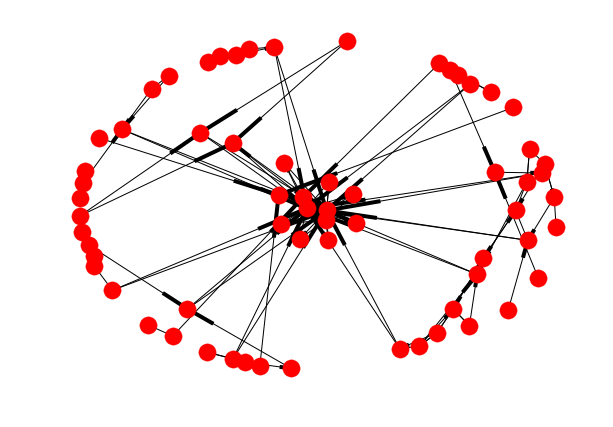

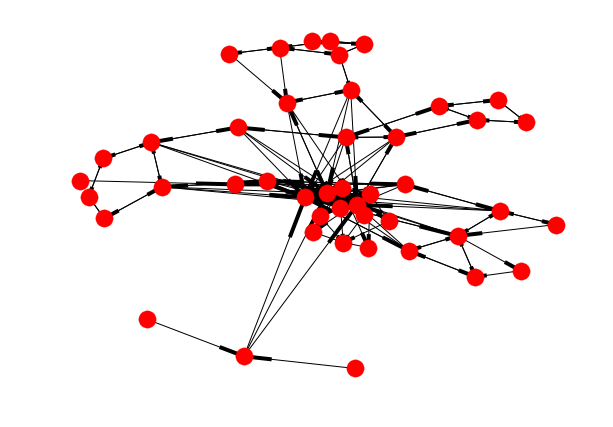

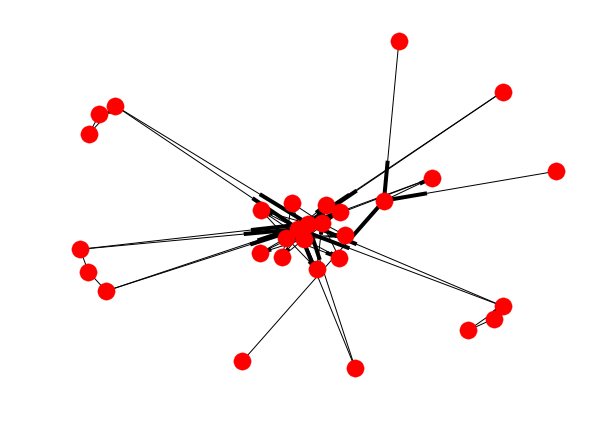

In [4]:
nx.draw(graph_floor_gnd,cmap = plt.get_cmap('jet'))
plt.show()
nx.draw(graph_floor_one,cmap = plt.get_cmap('jet'))
plt.show()
nx.draw(graph_floor_two,cmap = plt.get_cmap('jet'))
plt.show()

In [6]:
peopleInOfficeOne = array.array('i',(0 for i in range(0,OFFICE_FIRST_FLOOR)))
peopleInOfficeTwo = array.array('i',(0 for i in range(0,OFFICE_SECOND_FLOOR)))
peopleInOfficeGnd = array.array('i',(0 for i in range(0,OFFICE_GROUND_FLOOR)))
i = 1
j = 1
k = 1
# dataset
dataset = []
    
for pio in range(1,people_csv.shape[0]):
    if(i <= 1956):
        floor = 2;
    if(j <= 815):
        floor = 0;
    if(k <= 489):
        floor = 1;
    bmi = float(people[pio][4])
    age = randint(0,1);
    if(bmi < 30):
        office = getOfficeFloor(floor)
        setPeopleInOffice(floor,office)

        sex = "Male"
        if (floor == 0): # First Floor
            length_ideal, path = nx.bidirectional_dijkstra(graph_floor_one, office, EXIT_FIRST_FLOOR)
        elif (floor == 1):# Second Floor
            length_ideal, path = nx.bidirectional_dijkstra(graph_floor_two, office, EXIT_SECOND_FLOOR)
        elif (floor == 2):# Ground Floor
            length_ideal, path = nx.bidirectional_dijkstra(graph_floor_gnd, office, EXIT_GROUND_FLOOR)

        if (people[pio][3] == "1"):
            CANT_MALE = CANT_MALE + 1
        else:
            CANT_FEMALE = CANT_FEMALE + 1
            sex = "Female"

        times_normal = getTimePersonPath(floor, path, bmi, NORMAL, int(people[pio][3]),age)
        times_fast = getTimePersonPath(floor, path, bmi, FAST, int(people[pio][3]),age) 
        #print bmi," ", times_normal
        dataset.append([sex,age, bmi,times_normal,times_fast,office,floor,' '.join(str(x) for x in path),length_ideal])
        if(i <= 1956):
            i= 1+1
        if(j <= 815):
            j = j+1
        if(k <= 489):
            k= k+1
    

data = pd.DataFrame(data=dataset, columns=['Sex','Age','BMI','TimeNormal','TimeFast','Office','Floor','Path','Lenght'])
print peopleInOfficeOne
print peopleInOfficeTwo
print peopleInOfficeGnd

data.to_csv("all_floor.csv", sep=';', encoding='utf-8')


array('i', [19, 18, 17, 9, 17, 26, 13, 13, 21, 18, 20, 6, 21, 13, 14, 19, 13, 12, 17, 20])
array('i', [61, 41, 56, 63, 49, 59, 53, 47, 60])
array('i', [44, 72, 58, 63, 58, 54, 60, 59, 57, 62, 69, 57, 62, 57, 63, 40, 48, 47, 55, 67, 72, 59, 66, 59, 63, 59, 58, 66, 68, 56, 59, 51, 48, 59, 55, 48, 62, 46, 61, 62, 53, 62])


In [7]:
#Ground Floor
peopleInOfficeOne = array.array('i',(0 for i in range(0,OFFICE_FIRST_FLOOR)))
peopleInOfficeTwo = array.array('i',(0 for i in range(0,OFFICE_SECOND_FLOOR)))
peopleInOfficeGnd = array.array('i',(0 for i in range(0,OFFICE_GROUND_FLOOR)))
# dataset
dataset = []
    
for pio in range(1,people_csv.shape[0]):
    floor = 2
    bmi = float(people[pio][4])
    age = randint(0,1);
    if(bmi < 30):
        office = getOfficeFloor(floor)
        setPeopleInOffice(floor,office)

        sex = "Male"
        if (floor == 0): # First Floor
            length_ideal, path = nx.bidirectional_dijkstra(graph_floor_one, office, EXIT_FIRST_FLOOR)
        elif (floor == 1):# Second Floor
            length_ideal, path = nx.bidirectional_dijkstra(graph_floor_two, office, EXIT_SECOND_FLOOR)
        elif (floor == 2):# Ground Floor
            length_ideal, path = nx.bidirectional_dijkstra(graph_floor_gnd, office, EXIT_GROUND_FLOOR)

        if (people[pio][3] == "1"):
            CANT_MALE = CANT_MALE + 1
        else:
            CANT_FEMALE = CANT_FEMALE + 1
            sex = "Female"

        times_normal = getTimePersonPath(floor, path, bmi, NORMAL, int(people[pio][3]),age)
        times_fast = getTimePersonPath(floor, path, bmi, FAST, int(people[pio][3]),age) 
        #print bmi," ", times_normal
        dataset.append([sex,age, bmi,times_normal,times_fast,office,floor,' '.join(str(x) for x in path),length_ideal])
    

data = pd.DataFrame(data=dataset, columns=['Sex','Age','BMI','TimeNormal','TimeFast','Office','Floor','Path','Lenght'])
print peopleInOfficeOne
print peopleInOfficeTwo
print peopleInOfficeGnd

data.to_csv("ground_floor.csv", sep=';', encoding='utf-8')

array('i', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
array('i', [0, 0, 0, 0, 0, 0, 0, 0, 0])
array('i', [66, 84, 70, 71, 67, 81, 70, 69, 79, 72, 74, 76, 73, 90, 69, 70, 93, 75, 70, 74, 68, 77, 80, 71, 79, 90, 77, 91, 77, 78, 76, 82, 81, 73, 95, 90, 75, 83, 78, 90, 86, 69])
